# Wearable Data Affective State Classifier

This notebook is divided into 2 parts:

- Data Visualization
- Model optimization

# Data Visualization

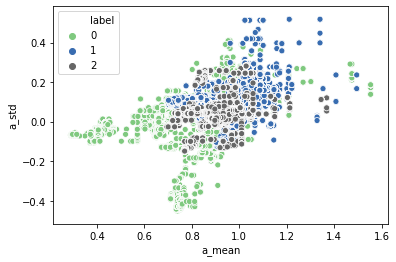

In [48]:
# Now let's visualize the accelerometer mean colored by the affective state label 
sns.scatterplot(x='a_mean',y='a_std',hue='label', data=df_AllData, palette='Accent')

## This scatterplot shows that plotting the accelerometer mean (over all directions), against the accelerometer standard deviation (over all directions) shows a natural separation of the different affective states.

# Model optimization

In [ ]:
# Let's look at a summary of the model
model.summary()

In [46]:
# Evaluate the fitted moel using the accuracy metric
scores, accu = model.evaluate(X_test, y_test, batch_size=batch_size)

print('score:', scores)
print('accuracy:', accu)

30454/30454 [==============================] - 3s 98us/step
score: 0.030836466451110742
accuracy: 0.9889676570892334


##  Model accuracy ~ 99%

In [ ]:
p1, = host.plot(lr_to_test, score, "b-", label="Validation Loss")
p2, = par1.plot(lr_to_test, Stop_epoch, "r-", label="Stop Epoch")

## Optimal Learning Rate is 0.05 -- fewest epochs with the lowest Validation Loss

In [ ]:
model.metrics_names

In [ ]:
p1, = host.plot(lr_to_test, acc, "b-", label="Accuracy")
p2, = par1.plot(lr_to_test, Stop_epoch, "r-", label="Stop Epoch")

In [ ]:
import matplotlib.pyplot as plt


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()

p1, = host.plot(lr_to_test, score, "b-", label="Validation Loss")
p2, = par1.plot(lr_to_test, Stop_epoch, "r-", label="Stop Epoch")

host.set_xlim(0.01, 0.1)
host.set_ylim(0, .08)
par1.set_ylim(0, 21)


host.set_xlabel("Learning Rate")
host.set_ylabel("Validation Loss")
par1.set_ylabel("Stop Epoch")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=3, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [ ]:
def get_new_model():

    # Create the model instance and define the network structure
    model = Sequential()
    model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
    model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=False))
    model.add(Dense(3, activation='sigmoid'))
    
    return model

In [ ]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Learning rates to iterate over
lr_to_test = np.arange(0.05,0.5,0.25)

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Initialize the variables recording score, accuracy and Stop_epoch
score = np.zeros(len(lr_to_test))
acc = np.zeros(len(lr_to_test))
Stop_epoch = np.zeros(len(lr_to_test))

print('Training LSTM...')

batch_size = 5 # I think I want to use batch_size = 1

# Loop over learning rates
for i, lr in enumerate(lr_to_test):
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # Now fit the model to the training data
    model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=20,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping_monitor])
    
    # For each learning rate, evaluate the fitted model using the accuracy metric
    score[i], acc[i] = model.evaluate(X_test, y_test, batch_size=batch_size)
    
    # For each learning rate, record the epoch where training was stopped
    Stop_epoch[i] = early_stopping_monitor.stopped_epoch

Training LSTM...


Testing model with learning rate: 0.050000

Train on 91359 samples, validate on 30454 samples
Epoch 1/20
91359/91359 [==============================] - 35s 382us/step - loss: 0.5506 - accuracy: 0.7247 - val_loss: 0.4775 - val_accuracy: 0.7868
Epoch 2/20
91359/91359 [==============================] - 32s 348us/step - loss: 0.4613 - accuracy: 0.7948 - val_loss: 0.4238 - val_accuracy: 0.8185
Epoch 3/20
91359/91359 [==============================] - 30s 324us/step - loss: 0.3681 - accuracy: 0.8378 - val_loss: 0.3410 - val_accuracy: 0.8489
Epoch 4/20
91359/91359 [==============================] - 36s 399us/step - loss: 0.2888 - accuracy: 0.8691 - val_loss: 0.2422 - val_accuracy: 0.8905
Epoch 5/20
91359/91359 [==============================] - 34s 373us/step - loss: 0.2107 - accuracy: 0.9086 - val_loss: 0.2036 - val_accuracy: 0.9029
Epoch 6/20
91359/91359 [==============================] - 40s 436us/step - loss: 0.1639 - accuracy: 0.9280 - val_loss: 0.1345 - val_accuracy: 

In [ ]:
Stop_epoch[Stop_epoch == 0] = 20

In [ ]:
Stop_epoch

In [ ]:

# sns.pairplot(df_AllData,
#              kind="scatter", 
#              hue='label')